In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [5]:
sdf = pd.read_csv('../data/ml/salaries.csv')
print(sdf.shape)
sdf.head()


(16, 4)


,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [13]:
inputs = sdf.drop('salary_more_then_100k', axis="columns")
targets = sdf['salary_more_then_100k']

In [14]:
company_le = LabelEncoder()
job_le = LabelEncoder()
degree_le = LabelEncoder()

inputs['company_le'] = company_le.fit_transform(inputs['company'])
inputs['job_le'] = company_le.fit_transform(inputs['job'])
inputs['degree_le'] = company_le.fit_transform(inputs['degree'])

inputs.head(8)


,company,job,degree,company_le,job_le,degree_le
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0


In [15]:
inputs.drop(['company','job','degree'],axis="columns",inplace = True)
inputs.head(8)

,company_le,job_le,degree_le
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0


In [27]:
# No test train split here
dtm = tree.DecisionTreeClassifier()
dtm.fit(inputs,targets)

dtm.score(inputs,targets)

1.0

In [21]:
dtm.predict([[2,1,0]])

/Users/reddy/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [80]:
#Titanic dataset
tdf = pd.read_csv('../data/ml/titanic.csv')
print(tdf.shape)
tdf.head()


(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
tdf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [82]:
tdf.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:>

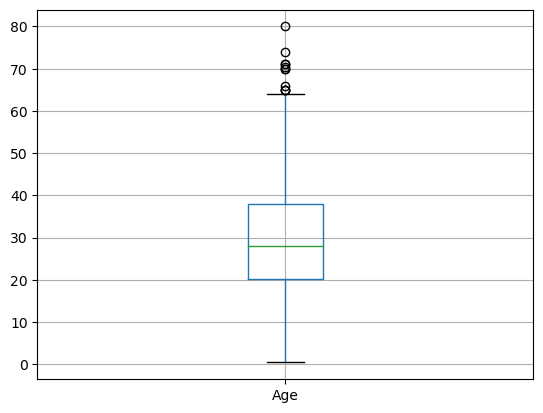

In [83]:
tdf.boxplot(['Age'])

In [84]:
#Drop the columns not relevant for the prediction
tdf.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis="columns", inplace=True)
tdf.head(20)
#Remove the outliers for Age and fill in missing values of Age with mean age.

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
5,0,3,male,NaN,8.4583
6,0,1,male,54.0,51.8625
7,0,3,male,2.0,21.0750
8,1,3,female,27.0,11.1333
9,1,2,female,14.0,30.0708


In [85]:
#From box plot above age outliers are > 65
tdf[tdf.Age > 65]

,Survived,Pclass,Sex,Age,Fare
33,0,2,male,66.0,10.5000
96,0,1,male,71.0,34.6542
116,0,3,male,70.5,7.7500
493,0,1,male,71.0,49.5042
630,1,1,male,80.0,30.0000
672,0,2,male,70.0,10.5000
745,0,1,male,70.0,71.0000
851,0,3,male,74.0,7.7750


In [86]:
#Remove the age outliers
outliers_index = tdf[tdf.Age > 65].index
print(outliers_index)
tdf_without_age_outliers = tdf.drop(outliers_index,axis=0)
tdf_without_age_outliers[tdf_without_age_outliers.Age > 65]

Int64Index([33, 96, 116, 493, 630, 672, 745, 851], dtype='int64')


,Survived,Pclass,Sex,Age,Fare


In [87]:
mean = math.floor(tdf_without_age_outliers.Age.mean())
print("Mean = {}".format(mean))
tdf.Age.isnull().sum()

Mean = 29


177

In [88]:
tdf.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [89]:
tdf.Age.fillna(mean,inplace=True)
tdf.Age.isnull().sum()

0

In [90]:
tdf.Age.describe()

count    891.000000
mean      29.560236
std       13.005010
min        0.420000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [91]:
tdf.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [92]:
sex_le = LabelEncoder()
tdf['sex_le'] = sex_le.fit_transform(tdf.Sex)
tdf.drop(['Sex'],axis="columns",inplace=True)
tdf.head()


,Survived,Pclass,Age,Fare,sex_le
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


In [93]:
inputs = tdf.drop(['Survived'],axis="columns")
targets = tdf.Survived

tdtm = tree.DecisionTreeClassifier()
tdtm.fit(inputs,targets)

tdtm.score(inputs,targets)

0.9741863075196409

In [97]:
tdtm.predict([[3,26,7.925,0]])

/Users/reddy/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])